In [0]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# mount google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/DataSets

In [0]:
data= pd.read_csv('housingData-Real.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [0]:
# select our columns
livingspace= data['sqft_living']
price= data['price']

In [0]:
# conver livingspace and price into a matrix
X= np.array(livingspace).reshape(-1, 1)

y= np.array(price)

In [0]:
# convert data into test and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=1/3)

In [9]:
X_test

array([[3040],
       [ 760],
       [2120],
       ...,
       [1980],
       [ 960],
       [3190]])

In [10]:
# pass data into linear regression model
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# create a predictor
predictor= regressor.predict(X_test)

In [12]:
predictor

array([818401.55951733, 165660.97340292, 555015.00722555, ...,
       514934.44492028, 222918.91955331, 861345.01913012])

Text(0, 0.5, 'Price')

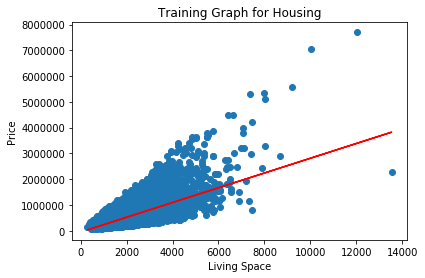

In [15]:
# this prediction is more helpful with graphs/plots

#plot for training dataset
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Training Graph for Housing')
plt.xlabel('Living Space')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

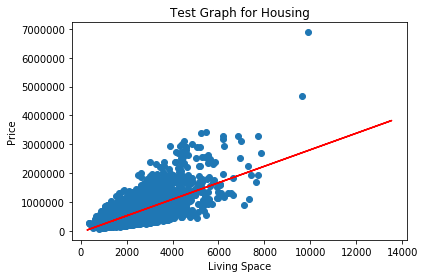

In [16]:
# plot for trainig dataset
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Test Graph for Housing')
plt.xlabel('Living Space')
plt.ylabel('Price')